In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import os
import random
import pickle
import numpy as np


from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
import random
import pprint
import sys
import time
import numpy as np
from optparse import OptionParser
import pickle
import math
import cv2
import copy
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd
import os

from sklearn.metrics import average_precision_score

from keras import backend as K
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, TimeDistributed
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.objectives import categorical_crossentropy

from keras.models import Model
from keras.utils import generic_utils
from keras.engine import Layer, InputSpec
from keras import initializers, regularizers

In [14]:
ROOT_DIR = os.path.abspath(".")
img_folder = r"/home/mirandalv/Documents/github/geo_AnimalDetection/dataset/processing_data/clipped"

In [15]:
train_df = pd.read_csv(os.path.join(ROOT_DIR, "dataset/processing_data/train_annotation.csv"))

train_df['image_path'] = train_df.apply(lambda x: os.path.join(img_folder, x['image_name']), axis=1)


In [16]:
train_df

,image_name,image_path,label,xmax,xmin,ymax,ymin,id
0,320.tif,/home/mirandalv/Documents/github/geo_AnimalDet...,bird,144,99,20,0,320
1,320.tif,/home/mirandalv/Documents/github/geo_AnimalDet...,bird,222,179,43,21,320
2,320.tif,/home/mirandalv/Documents/github/geo_AnimalDet...,bird,176,139,66,30,320
3,320.tif,/home/mirandalv/Documents/github/geo_AnimalDet...,bird,137,100,58,23,320
4,320.tif,/home/mirandalv/Documents/github/geo_AnimalDet...,bird,96,57,24,0,320
...,...,...,...,...,...,...,...,...
3879,535.tif,/home/mirandalv/Documents/github/geo_AnimalDet...,bird,235,188,130,97,535
3880,535.tif,/home/mirandalv/Documents/github/geo_AnimalDet...,bird,270,225,166,137,535
3881,535.tif,/home/mirandalv/Documents/github/geo_AnimalDet...,bird,257,213,218,194,535
3882,535.tif,/home/mirandalv/Documents/github/geo_AnimalDet...,bird,212,168,217,189,535


In [17]:
def plot_bbox_plt(img_name):
    
    img_url = train_df.loc[train_df["image_name"]==img_name]['image_path'].values[0]
    
    fig = plt.figure()

    #add axes to the gimage
    ax = fig.add_axes([0,0,1,1])

    # read and plot the image
    image = plt.imread(img_url)
    plt.imshow(image)


    # iterating over the image for different objects
    for _,row in train_df[train_df["image_name"] == img_name].iterrows():
        
        """
        xmin = row.miny
        xmax = row.maxy
        ymin = row.maxx
        ymax = row.minx
        """
        
        xmin = row.xmin
        xmax = row.xmax
        ymin = row.ymin
        ymax = row.ymax

        
        width = xmax - xmin
        height = ymax - ymin
    
        # assign different color to different classes of objects
        edgecolor = 'r'
        a = 5
        b = 5
        ax.annotate('bird', xy=(xmax-a,ymin+b))
        
        
        # add bounding boxes to the image
        rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')

        ax.add_patch(rect)

In [18]:
img_names = train_df["image_name"].value_counts().tail(50).index.values

In [19]:
img_names = train_df["image_name"].value_counts().index.values

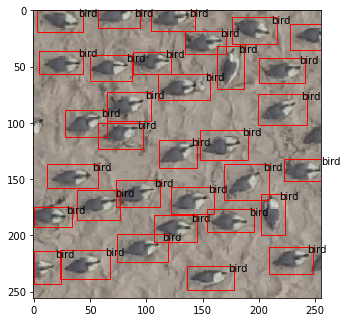

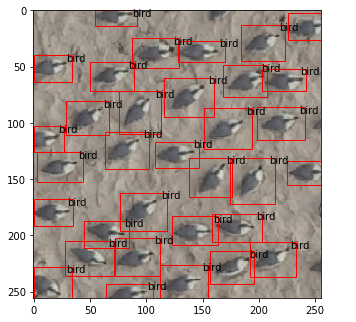

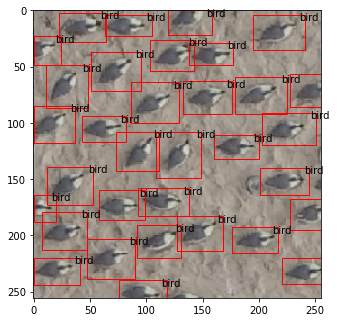

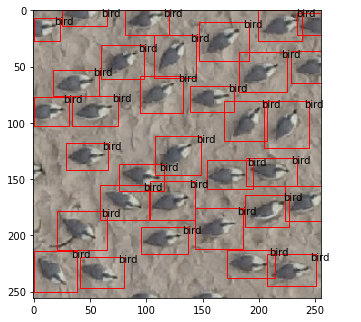

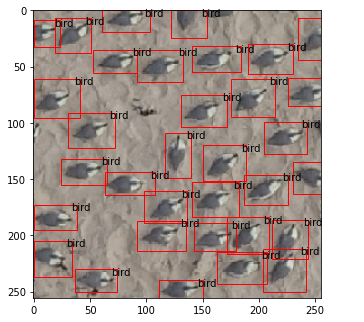

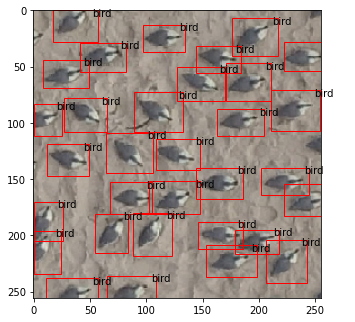

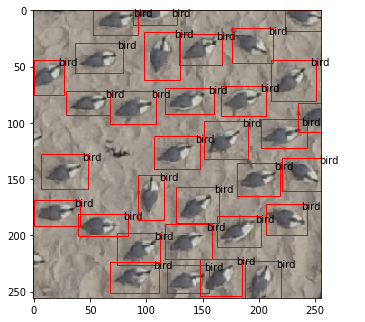

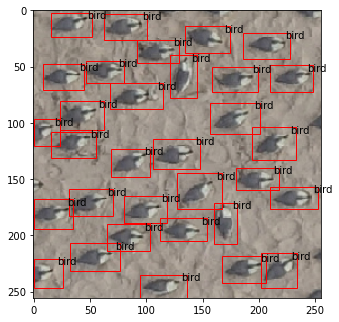

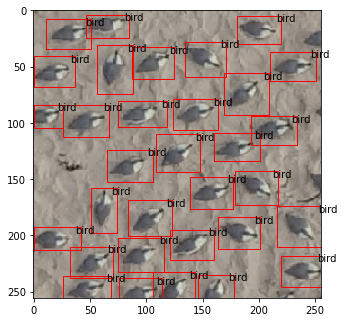

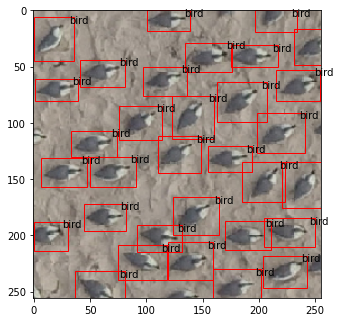

In [20]:
for name in img_names[:10]:
    plot_bbox_plt(name)